the code!

Loading finger data...
Finger data loaded successfully.
   1.077000000000000000e+04  1.118300000000000000e+04  2.000000000000000000e+00
0                   11898.0                   12382.0                       4.0
1                   11903.0                   12419.0                       5.0
2                   11937.0                   12418.0                       3.0
3                   12855.0                   13300.0                       5.0
4                   12857.0                   13240.0                       4.0
Loading ECOG data...
ECOG data loaded successfully.
   ECOG_Signal
0       1004.0
1        663.0
2        376.0
3        190.0
4         52.0


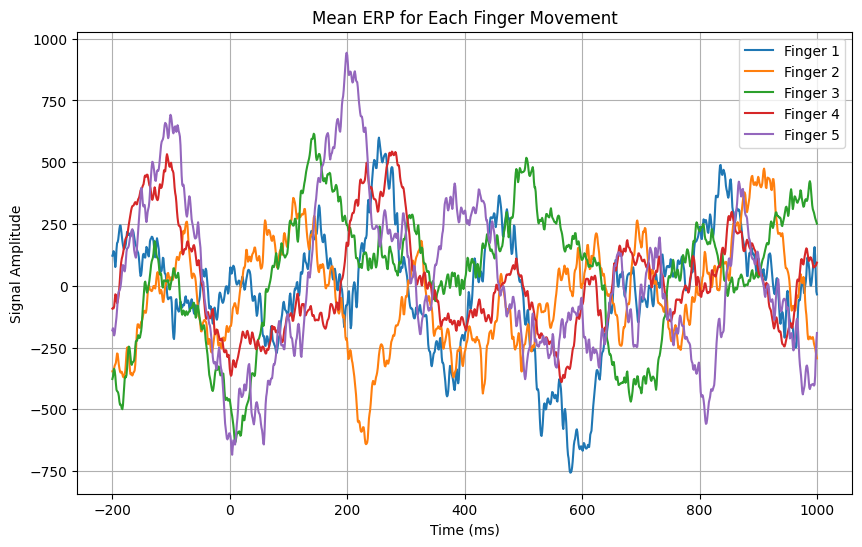


The 5x1201 matrix as a DataFrame:
              Time 0      Time 1      Time 2      Time 3      Time 4      Time 5      Time 6      Time 7      Time 8      Time 9     Time 10     Time 11     Time 12     Time 13     Time 14     Time 15     Time 16     Time 17     Time 18     Time 19     Time 20     Time 21     Time 22     Time 23     Time 24     Time 25     Time 26     Time 27     Time 28     Time 29     Time 30     Time 31     Time 32     Time 33     Time 34     Time 35     Time 36     Time 37     Time 38     Time 39     Time 40     Time 41     Time 42     Time 43     Time 44     Time 45     Time 46     Time 47     Time 48     Time 49     Time 50     Time 51     Time 52     Time 53     Time 54     Time 55     Time 56     Time 57     Time 58     Time 59     Time 60     Time 61     Time 62     Time 63     Time 64     Time 65     Time 66     Time 67     Time 68     Time 69     Time 70     Time 71     Time 72     Time 73     Time 74     Time 75     Time 76     Time 77     Time 78     Time

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure pandas to display the entire DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

def calc_mean_erp(trial_points, ecog_data):
    """
    Calculate and plot the mean ERP for each finger movement.

    Args:
    trial_points (pd.DataFrame): DataFrame with columns ['start', 'peak', 'finger'].
    ecog_data (pd.DataFrame): DataFrame with a single column of brain signal.

    Returns:
    np.ndarray: 5x1201 matrix of averaged ERPs.
    """
    # Ensure column names and types are correct
    trial_points.columns = ['start', 'peak', 'finger']
    trial_points = trial_points.astype({'start': int, 'peak': int, 'finger': int})

    # Define constants for ERP window
    pre_event_duration = 200  # 200 ms before start
    post_event_duration = 1000  # 1000 ms after start
    total_samples = pre_event_duration + post_event_duration + 1  # Total 1201 samples

    # Initialize an empty matrix for ERPs
    erp_matrix = np.zeros((5, total_samples))

    # Process each finger movement
    for finger in range(1, 6):
        finger_trials = trial_points[trial_points['finger'] == finger]
        segments = []

        for _, trial in finger_trials.iterrows():
            start_idx = trial['start'] - pre_event_duration
            end_idx = trial['start'] + post_event_duration + 1

            # Only include segments within valid bounds
            if 0 <= start_idx < len(ecog_data) and end_idx <= len(ecog_data):
                segment = ecog_data.iloc[start_idx:end_idx, 0].to_numpy()
                segments.append(segment)

        # Compute the mean ERP for the finger
        if segments:
            erp_matrix[finger - 1, :] = np.mean(segments, axis=0)

    # Plot the ERPs
    time_axis = np.linspace(-200, 1000, total_samples)  # Time in ms
    plt.figure(figsize=(10, 6))
    for finger in range(5):
        plt.plot(time_axis, erp_matrix[finger], label=f'Finger {finger + 1}')
    plt.title('Mean ERP for Each Finger Movement')
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

    return erp_matrix

# Load the data
print("Loading finger data...")
trial_points = pd.read_csv('events_file_ordered.csv', dtype={'start': int, 'peak': int, 'finger': int})
print("Finger data loaded successfully.")
print(trial_points.head())

print("Loading ECOG data...")
ecog_data = pd.read_csv('brain_data_channel_one.csv', header=None, names=['ECOG_Signal'])
print("ECOG data loaded successfully.")
print(ecog_data.head())

# Calculate the mean ERP
erp_result = calc_mean_erp(trial_points, ecog_data)

# Save the ERP matrix to a CSV file
fingers_erp_mean_df = pd.DataFrame(
    erp_result,
    index=[f'Finger {i+1}' for i in range(5)],
    columns=[f'Time {i}' for i in range(erp_result.shape[1])]
)
fingers_erp_mean_df.to_csv('fingers_erp_mean_output.csv', index=True)

# Display the ERP matrix as a DataFrame
print("\nThe 5x1201 matrix as a DataFrame:")
print(fingers_erp_mean_df)

print("ERP calculation completed and saved to 'fingers_erp_mean_output.csv'.")




















